### K Nearest Neighbor Algorithm

The k-nearest neighbor algorithm is a type of **supervised machine learning algorithm** used to solve classification and regression problems. However, it's mainly used for classification problems.

The algorithm’s learning is:

1. **Instance-based learning:** Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. **Lazy Learning:** Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. **Non -Parametric:** In KNN, there is no predefined form of the mapping function.

#### The following is the pseudocode for KNN:

1. Load the data
2. Choose K value
3. For each data point in the data:
    - Find the Euclidean distance to all training data samples
    - Store the distances on an ordered list and sort it
    - Choose the top K entries from the sorted list
    - Label the test point based on the majority of classes present in the selected points
4. End

#### Some of the advantages of using the k-nearest neighbors algorithm:

- It's easy to understand and simple to implement
- It can be used for both classification and regression problems
- It's ideal for non-linear data since there's no assumption about underlying data
- It can naturally handle multi-class cases
- It can perform well with enough representative data

#### Disadvantages of using the k-nearest neighbors algorithm:

- Associated computation cost is high as it stores all the training data
- Requires high memory storage
- Need to determine the value of K
- Prediction is slow if the value of N is high
- Sensitive to irrelevant features

The k-nearest neighbors algorithm is highly susceptible to overfitting due to the curse of dimensionality. KNN doesn't work well if there are too many features. Hence, dimensionality reduction techniques like principal component analysis (PCA) and feature selection must be performed during the data preparation phase.

### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [7]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
ds = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=names)
ds.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
ds.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [14]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, 4].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=20)
x_test

array([[4.6, 3.2, 1.4, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.5, 4. , 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 2.5, 5.8, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [6.5, 3. , 5.2, 2. ],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.2, 5. , 1.5],
       [5. , 3.2, 1.2, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [4.3, 3. , 1.1, 0.1],
       [6.6, 2.9, 4.6, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [4.9, 2.4, 3.3, 1. ],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 5.1, 1.8],
       [6.4, 2.7, 5.3, 1.9],
       [5.4, 3.4, 1.7, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 3.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 2.8, 5.1, 1.5]])

In [18]:
s_scaler  = StandardScaler()
x_test = s_scaler.fit_transform(x_test)
x_train = s_scaler.fit_transform(x_train)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [24]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
ypred = classifier.predict(x_test)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.77      0.91      0.83        11
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.87        30
      macro avg       0.89      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
error

[0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666,
 0.13333333333333333,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333]

Text(0, 0.5, 'Mean Error')

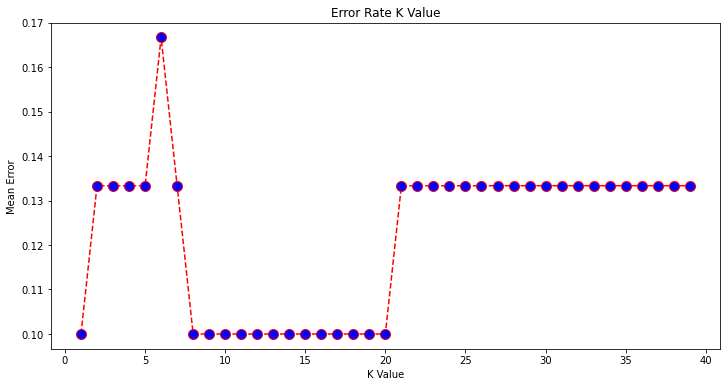

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##### Example 2

In [29]:
from sklearn.datasets import make_classification

In [30]:
X,Y = make_classification(n_features=8,n_samples=250,n_classes=2,random_state=15)

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)

In [32]:
s_sclr = StandardScaler()
X_train = s_sclr.fit_transform(X_train) 
X_test = s_sclr.fit_transform(X_test) 

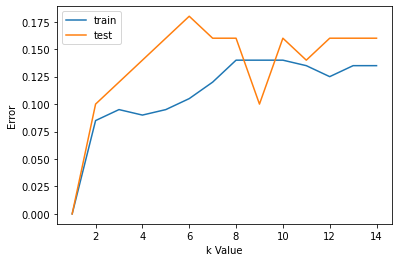

In [34]:
error1 = []
error2 = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yp1 = knn.predict(X_train)
    error1.append(np.mean(y_train!=yp1))
    knn.fit(X_test,y_test)
    yp2 = knn.predict(X_test)
    error2.append(np.mean(y_test != yp2))
plt.plot(range(1,15),error1, label="train")
plt.plot(range(1,15),error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [35]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.88